# Exploratory Data Analysis for Kaggle Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haydenji","key":"7d3b906a4522a7e73489b1a010b9f920"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c open-problems-single-cell-perturbations

100% 3.83G/3.83G [02:17<00:00, 34.6MB/s]
100% 3.83G/3.83G [02:17<00:00, 29.8MB/s]


In [ ]:
!mkdir train
!unzip open-problems-single-cell-perturbations.zip -d train

Archive:  open-problems-single-cell-perturbations.zip
  inflating: train/adata_excluded_ids.csv  
  inflating: train/adata_obs_meta.csv  
  inflating: train/adata_train.parquet  
  inflating: train/de_train.parquet  
  inflating: train/id_map.csv        
  inflating: train/multiome_obs_meta.csv  
  inflating: train/multiome_train.parquet  
  inflating: train/multiome_var_meta.csv  
  inflating: train/sample_submission.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
de_train = pd.read_parquet(f"./train/de_train.parquet")
de_train.head()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629


In [ ]:
de_train["control"].value_counts()

False    602
True      12
Name: control, dtype: int64

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=d7b86608be22d893a3f11b0c454567e2fdc72505a337d57a89fa9dba52aa6bab
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

In [ ]:
reducer = umap.UMAP()
de_train_data = de_train.iloc[:,5:].values
scaled_de_train_data = StandardScaler().fit_transform(de_train_data)
embedding = reducer.fit_transform(scaled_de_train_data)

In [ ]:
ct_map = de_train.cell_type.map({"NK cells":0, "T cells CD4+":1, "T regulatory cells":2,
                        "T cells CD8+":3, "B cells":4, "Myeloid cells":5})
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

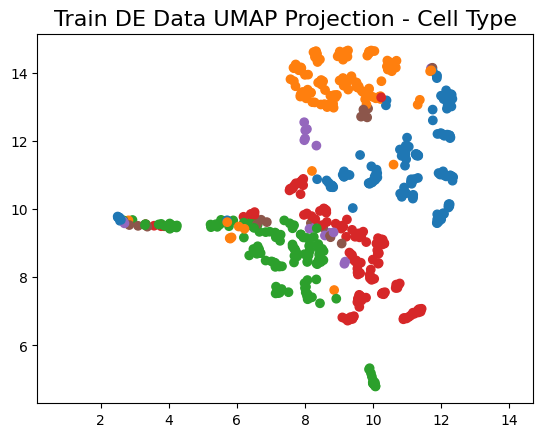

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in ct_map])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Train DE Data UMAP Projection - Cell Type', fontsize=16);

In [ ]:
de_train["sm_name"].value_counts()
print(de_train["sm_name"].value_counts()[0:10])

R428                        6
MLN 2238                    6
Dactolisib                  6
LDN 193189                  6
Porcn Inhibitor III         6
O-Demethylated Adapalene    6
Penfluridol                 6
Dabrafenib                  6
Linagliptin                 6
CHIR-99021                  6
Name: sm_name, dtype: int64


In [ ]:
chem = ["O-Demethylated Adapalene", "Penfluridol", "Dabrafenib", "Linagliptin", "CHIR-99021"]
de_train_subset = de_train[de_train['sm_name'].isin(chem)]
de_train_subset.head()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
72,B cells,Linagliptin,LSM-45916,CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc(C)...,False,-0.096688,0.057827,0.261704,0.054919,1.010873,...,-0.130766,-0.990278,-1.384846,0.742082,-0.349105,-0.091224,-0.721902,-0.098806,-1.570230,-0.013876
73,Myeloid cells,Linagliptin,LSM-45916,CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc(C)...,False,-0.463122,0.161972,0.446527,-0.244721,1.592027,...,0.041995,-0.329927,0.301065,0.097764,0.016425,-0.050881,-0.414133,-0.259675,1.000058,-1.020959
74,NK cells,Linagliptin,LSM-45916,CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc(C)...,False,-0.331659,-0.115675,0.112144,-0.012787,0.521185,...,0.446485,-0.074754,-1.511683,-1.116065,-0.509450,0.684176,-0.010951,-0.104867,0.283101,-0.078423
75,T cells CD4+,Linagliptin,LSM-45916,CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc(C)...,False,-0.177178,-0.124321,-0.088521,0.363095,-0.491432,...,0.008883,0.793286,-0.344169,-0.451554,-0.552118,1.051585,-0.359527,0.255076,0.293871,-0.797985
76,T cells CD8+,Linagliptin,LSM-45916,CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc(C)...,False,-0.013807,0.610431,-0.395224,-0.096093,0.067666,...,-0.083077,-1.286293,0.810416,-0.239286,-0.239539,0.450153,-0.011120,-0.002302,-0.355698,-0.161074


In [ ]:
chem_map = de_train_subset.sm_name.map({"O-Demethylated Adapalene":0, "Penfluridol":1, "Dabrafenib":2,
                        "Linagliptin":3, "CHIR-99021":4})
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
reducer = umap.UMAP()
de_train_data = de_train_subset.iloc[:,5:].values
scaled_de_train_data = StandardScaler().fit_transform(de_train_data)
embedding = reducer.fit_transform(scaled_de_train_data)

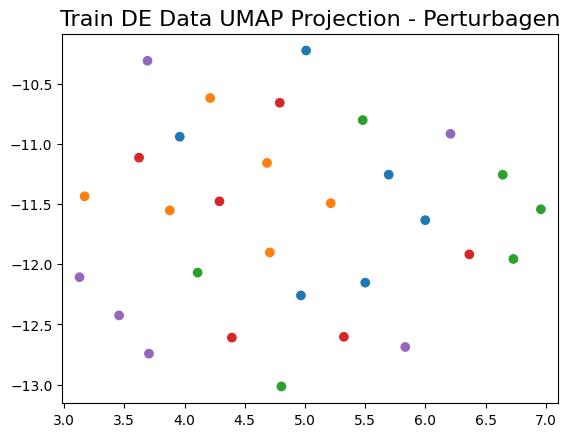

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in chem_map])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Train DE Data UMAP Projection - Perturbagen', fontsize=16);

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
de_train_subset = de_train[de_train["sm_name"] == "Penfluridol"]
ge = de_train_subset.iloc[:,5:].T
scaled_ge = StandardScaler().fit_transform(ge)

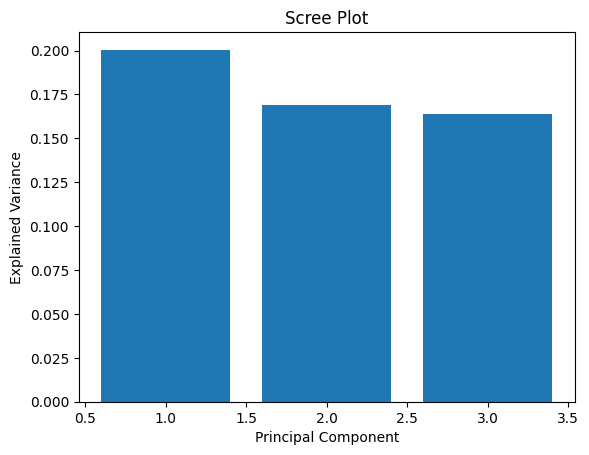

(18211, 3)

In [ ]:
comps = 3
pca = PCA(n_components=comps)
pca.fit(scaled_ge)
transformed_df = pca.fit_transform(scaled_ge)
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, comps + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()
transformed_df.shape

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2)
cluster_labels = cluster.fit_predict(scaled_ge)

In [ ]:
group1 = []
group2 = []
for i in range(len(cluster_labels)):
  if cluster_labels[i] == 0:
    group1.append(i)
  else:
    group2.append(i)

In [ ]:
group1_ext = [(x, 1) for x in group1]
group2_ext = [(x, 2) for x in group2]
merged = group1_ext + group2_ext
merged_sorted = sorted(merged, key=lambda x: x[0])
color_lst = [sns.color_palette()[i] for x, i in merged_sorted]

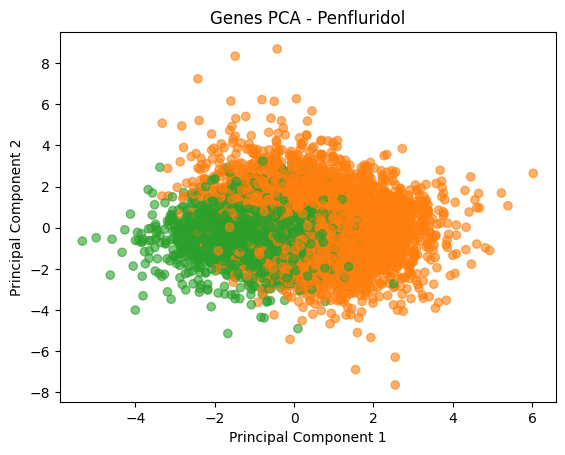

In [ ]:
plt.scatter(transformed_df[:, 0], transformed_df[:, 1], c=color_lst, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Genes PCA - Penfluridol')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
de_train = pd.read_parquet(f"./train/de_train.parquet")
scaled_de_train = pd.DataFrame(StandardScaler().fit_transform(de_train.iloc[:,5:]))

In [ ]:
ct_df = de_train.iloc[:,0:1]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(ct_df)
ct_ohe = ohe.transform(ct_df)
ct_ohe = ct_ohe.tolist()
scaled_de_train['cell_type_onehot'] = ct_ohe
de_train['cell_type_onehot'] = ct_ohe
de_train.head()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,cell_type_onehot
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"


In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 60.0 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import RDKFingerprint

In [ ]:
sm_df = de_train["SMILES"]
print(len(sm_df))
sm_df = sm_df.dropna()
print(len(sm_df))

614
614


In [ ]:
cs_arr = []
for sm in sm_df:
  try:
    cs = Chem.CanonSmiles(sm)
    cs_arr.append(cs)
  except:
    print('Invalid SMILES: ', sm)
print(len(cs_arr))

614


In [ ]:
mols = [Chem.MolFromSmiles(x) for x in cs_arr]
fps = [np.array(RDKFingerprint(mol)) for mol in mols]
de_train['fingerprint'] = fps
de_train.head()
scaled_de_train['fingerprint'] = fps
scaled_de_train.head()

NameError: ignored

In [ ]:
# imports
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import time
import torch.nn.functional as F

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, df):
        self.dataframe = df
        self.ge = df.iloc[:,:-2]
        self.ct_sm = df.iloc[:,-2:]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        t1 = torch.tensor(self.ct_sm.iloc[0,0])
        t2 = torch.tensor(self.ct_sm.iloc[0,1])
        t = torch.cat((t1, t2), dim=0)
        # print(torch.Tensor(self.ge.iloc[index]))
        return t, torch.Tensor(self.ge.iloc[index])

In [ ]:
de_train_comm = de_train[(de_train["cell_type"] != "B cells") & (de_train["cell_type"] != "Myeloid cells")]
de_train_comm_t = CustomDataset(de_train_comm.iloc[:,5:])
# de_train_comm_t = CustomDataset(de_train_comm.iloc[:,5:])
train_size = int(0.999 * len(de_train_comm_t))
val_size = int(len(de_train_comm_t) - train_size)
comm_train_ds, comm_val_ds = torch.utils.data.random_split(de_train_comm_t,
 [train_size, val_size])
print((train_size, val_size))

(579, 1)


In [ ]:
de_train_novel = de_train[(de_train["cell_type"] == "B cells") | (de_train["cell_type"] == "Myeloid cells")]
duplicate_df = de_train_novel.copy()
concatenated_df = pd.concat([de_train_novel, duplicate_df], ignore_index=True)
de_train_novel_t = CustomDataset(concatenated_df.iloc[:,5:])
train_size = int(0.9 * len(de_train_novel_t))
val_size = int(len(de_train_novel_t) - train_size)
novel_train_ds, novel_val_ds = torch.utils.data.random_split(de_train_novel_t,
 [train_size, val_size])
print((train_size, val_size))

(61, 7)


In [ ]:
train_ds = torch.utils.data.ConcatDataset([comm_train_ds, novel_train_ds])
val_ds = torch.utils.data.ConcatDataset([comm_val_ds, novel_val_ds])

In [ ]:
#de_train_torch = CustomDataset(de_train.iloc[:,5:])
de_train_torch = CustomDataset(scaled_de_train)
train_size = int(0.99 * len(de_train_torch))
val_size = int(len(de_train_torch) - train_size)
test_size = len(de_train_torch) - val_size - train_size
train_ds, val_ds = torch.utils.data.random_split(de_train_torch,
 [train_size, val_size])
print((train_size, val_size))

(607, 7)


In [ ]:
loss_fn = nn.MSELoss()
epochs = 20
learning_rate = 0.0001
bsize = 612
decay = 0.001

In [ ]:
train_loader = DataLoader(
    train_ds,
    batch_size=bsize,
    shuffle = True
)
val_loader = DataLoader(
    val_ds,
    batch_size=bsize,
    shuffle = True
)

In [ ]:
for x, y in train_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([612, 2054])
torch.Size([612, 18211])


In [ ]:
from tqdm import tqdm

In [ ]:
# mlp
class Net(nn.Module):
  def __init__(self, input_size, output_size):
    super(Net, self).__init__()
    self.dense1 = nn.Linear(input_size, 2 * input_size)
    self.do1 = nn.Dropout(0.5)
    self.dense2 = nn.Linear(2 * input_size, 4 * input_size)
    self.do2 = nn.Dropout(0.5)
    self.dense3 = nn.Linear(4 * input_size, 8 * input_size)
    self.do3 = nn.Dropout(0.5)
    self.dense4 = nn.Linear(8 * input_size, output_size)

  def forward(self, input_data):
    out = F.leaky_relu(self.dense1(input_data))
    out = self.do1(out)
    out = F.leaky_relu(self.dense2(out))
    out = self.do2(out)
    out = F.leaky_relu(self.dense3(out))
    out = self.do3(out)
    out = self.dense4(out)
    return out

In [ ]:
# init weight
def init_weights(m):
  if isinstance(m, nn.Linear):
    # TODO: consider using other initialization schemes (He?)
    torch.nn.init.xavier_uniform_(m.weight.data)
    m.bias.data.fill_(0)

In [ ]:
gpu_boole = torch.cuda.is_available()
print(gpu_boole)

True


In [1]:
net = Net(input_size=2054, output_size=18211)
if gpu_boole:
  net = net.cuda()

NameError: ignored

In [ ]:
optim = torch.optim.AdamW(net.parameters(), lr=learning_rate, weight_decay=decay)
#optim = torch.optim.SGD(net.parameters(), lr=learning_rate, weight_decay=decay)

In [ ]:
def train(loader, model, optimizer, loss_fn, gpu_boole):
  model.train()
  total_loss = 0
  for data in tqdm(loader):
    x = data[0]
    y = data[1]
    if gpu_boole:
      x = x.cuda()
      y = y.cuda()
    optimizer.zero_grad()
    out = model(x)
    loss = loss_fn(out, y)
    total_loss += loss
    loss.backward()
    optimizer.step()
  # average loss per batch
  return total_loss / len(loader)

In [ ]:
def evaluate(loader, model, loss_fn, gpu_boole):
  model.eval()
  total_loss = 0
  with torch.no_grad():
    for data in tqdm(loader):
      x = data[0]
      y = data[1]
      if gpu_boole:
        x = x.cuda()
        y = y.cuda()
      out = model(x)
      loss = loss_fn(out, y)
      total_loss += loss
  return total_loss / len(loader)

In [ ]:
net.apply(init_weights)
loss = evaluate(val_loader, net, loss_fn, gpu_boole)
print("Average validation loss per batch: " + str(loss.cpu().data.numpy()))

100%|██████████| 1/1 [00:00<00:00, 18.30it/s]

Average validation loss per batch: 18.506943


In [ ]:
train_loss = []
val_loss = []
min_val_loss = float('inf')

for epoch in range(epochs):
  time1 = time.time()
  print("Epoch",epoch+1,':')
  loss = train(train_loader, net, optim, loss_fn, gpu_boole)
  print("Average train loss per batch: " + str(loss.cpu().data.numpy()))
  train_loss.append(loss.cpu().data.numpy())
  loss = evaluate(val_loader, net, loss_fn, gpu_boole)
  print("Average validation loss per batch: " + str(loss.cpu().data.numpy()))
  val_loss.append(loss.cpu().data.numpy())
  if loss.cpu().data.numpy() < min_val_loss:
    min_val_loss = loss.cpu().data.numpy()
    torch.save(net.state_dict(), 'best_model_params.pt')

  time2 = time.time() #timekeeping
  print('\nElapsed time for epoch:',time2 - time1,'s')
  print('ETA of completion:',(time2 - time1)*(epochs - epoch - 1)/60,'minutes')
  print()

Epoch 1 :


100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


Average train loss per batch: 6.6804266


100%|██████████| 1/1 [00:00<00:00, 26.94it/s]


Average validation loss per batch: 18.338364

Elapsed time for epoch: 7.580607652664185 s
ETA of completion: 2.4005257566769918 minutes

Epoch 2 :


100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Average train loss per batch: 5.6989164


100%|██████████| 1/1 [00:00<00:00, 24.17it/s]


Average validation loss per batch: 18.13774

Elapsed time for epoch: 7.643613338470459 s
ETA of completion: 2.293084001541138 minutes

Epoch 3 :


100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


Average train loss per batch: 9.378514


100%|██████████| 1/1 [00:00<00:00, 26.02it/s]


Average validation loss per batch: 17.73658

Elapsed time for epoch: 8.17765212059021 s
ETA of completion: 2.317001434167226 minutes

Epoch 4 :


100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


Average train loss per batch: 5.5913415


100%|██████████| 1/1 [00:00<00:00, 26.76it/s]


Average validation loss per batch: 17.427923

Elapsed time for epoch: 9.42922067642212 s
ETA of completion: 2.5144588470458986 minutes

Epoch 5 :


100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


Average train loss per batch: 4.9143767


100%|██████████| 1/1 [00:00<00:00, 26.61it/s]


Average validation loss per batch: 17.711332

Elapsed time for epoch: 3.0767619609832764 s
ETA of completion: 0.7691904902458191 minutes

Epoch 6 :


100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


Average train loss per batch: 4.016615


100%|██████████| 1/1 [00:00<00:00, 25.03it/s]


Average validation loss per batch: 17.595306

Elapsed time for epoch: 3.0508222579956055 s
ETA of completion: 0.7118585268656413 minutes

Epoch 7 :


100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


Average train loss per batch: 4.2708983


100%|██████████| 1/1 [00:00<00:00, 25.66it/s]


Average validation loss per batch: 17.3128

Elapsed time for epoch: 7.6195268630981445 s
ETA of completion: 1.650897487004598 minutes

Epoch 8 :


100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


Average train loss per batch: 4.676385


100%|██████████| 1/1 [00:00<00:00, 25.54it/s]


Average validation loss per batch: 17.20286

Elapsed time for epoch: 7.576198101043701 s
ETA of completion: 1.5152396202087401 minutes

Epoch 9 :


100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


Average train loss per batch: 4.9315634


100%|██████████| 1/1 [00:00<00:00, 26.79it/s]


Average validation loss per batch: 17.15943

Elapsed time for epoch: 10.766138553619385 s
ETA of completion: 1.973792068163554 minutes

Epoch 10 :


100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


Average train loss per batch: 9.2793045


100%|██████████| 1/1 [00:00<00:00, 24.94it/s]


Average validation loss per batch: 17.09315

Elapsed time for epoch: 7.434345483779907 s
ETA of completion: 1.2390575806299846 minutes

Epoch 11 :


100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


Average train loss per batch: 3.7015965


100%|██████████| 1/1 [00:00<00:00, 25.26it/s]


Average validation loss per batch: 17.017138

Elapsed time for epoch: 9.918991327285767 s
ETA of completion: 1.487848699092865 minutes

Epoch 12 :


100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


Average train loss per batch: 6.502224


100%|██████████| 1/1 [00:00<00:00, 24.62it/s]


Average validation loss per batch: 16.974566

Elapsed time for epoch: 7.585461854934692 s
ETA of completion: 1.0113949139912923 minutes

Epoch 13 :


100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


Average train loss per batch: 6.183755


100%|██████████| 1/1 [00:00<00:00, 25.79it/s]


Average validation loss per batch: 17.034966

Elapsed time for epoch: 3.0766587257385254 s
ETA of completion: 0.358943518002828 minutes

Epoch 14 :


100%|██████████| 2/2 [00:02<00:00,  1.45s/it]


Average train loss per batch: 6.5694265


100%|██████████| 1/1 [00:00<00:00, 25.15it/s]


Average validation loss per batch: 17.477135

Elapsed time for epoch: 3.0017001628875732 s
ETA of completion: 0.30017001628875734 minutes

Epoch 15 :


100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


Average train loss per batch: 4.6291823


100%|██████████| 1/1 [00:00<00:00, 25.63it/s]


Average validation loss per batch: 17.868446

Elapsed time for epoch: 3.035182476043701 s
ETA of completion: 0.2529318730036418 minutes

Epoch 16 :


100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


Average train loss per batch: 5.5283422


100%|██████████| 1/1 [00:00<00:00, 24.24it/s]


Average validation loss per batch: 17.51718

Elapsed time for epoch: 3.047353982925415 s
ETA of completion: 0.20315693219502767 minutes

Epoch 17 :


100%|██████████| 2/2 [00:02<00:00,  1.45s/it]


Average train loss per batch: 5.9919243


100%|██████████| 1/1 [00:00<00:00, 25.21it/s]


Average validation loss per batch: 17.209238

Elapsed time for epoch: 2.9943623542785645 s
ETA of completion: 0.14971811771392823 minutes

Epoch 18 :


100%|██████████| 2/2 [00:02<00:00,  1.45s/it]


Average train loss per batch: 9.732882


100%|██████████| 1/1 [00:00<00:00, 26.11it/s]


Average validation loss per batch: 17.347725

Elapsed time for epoch: 3.0082497596740723 s
ETA of completion: 0.10027499198913574 minutes

Epoch 19 :


100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


Average train loss per batch: 5.073471


100%|██████████| 1/1 [00:00<00:00, 24.75it/s]


Average validation loss per batch: 18.225973

Elapsed time for epoch: 3.017261028289795 s
ETA of completion: 0.05028768380482992 minutes

Epoch 20 :


100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


Average train loss per batch: 5.4072127


100%|██████████| 1/1 [00:00<00:00, 26.37it/s]

Average validation loss per batch: 19.474396

Elapsed time for epoch: 3.027172803878784 s
ETA of completion: 0.0 minutes



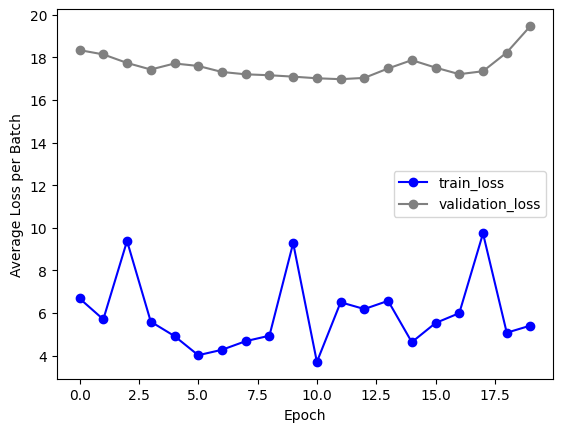

In [ ]:
plt.plot(train_loss, '-o', label = 'train_loss', color = 'blue')
plt.plot(val_loss, '-o', label = 'validation_loss', color = 'gray')
plt.xlabel('Epoch')
plt.ylabel('Average Loss per Batch')
plt.legend()
plt.show()

In [ ]:
id_map = pd.read_csv("./train/id_map.csv", sep=",", dtype=str)
id_map.columns
id_map.head()

In [ ]:
ohe_col = []
for x in id_map.cell_type:
  if x == "B cells":
    ohe_col.append([1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
  else:
    ohe_col.append([0.0, 1.0, 0.0, 0.0, 0.0, 0.0])
id_map["ohe_col"] = ohe_col
id_map.head()

In [ ]:
pert_df = de_train[["sm_name", "fingerprint"]]
pert_df['fingerprint'] = pert_df['fingerprint'].apply(tuple)
pert_df = pert_df.drop_duplicates()
len(pert_df)
pert_df['fingerprint'] = pert_df['fingerprint'].apply(tuple)

In [ ]:
def convert_to_array(lst):
    return np.array(lst)

In [ ]:
pert_df['fingerprint'] = pert_df['fingerprint'].apply(convert_to_array)
pert_df.head()

In [ ]:
id_map_merged = pd.merge(id_map, pert_df, on="sm_name", how='inner')
id_map_merged.head()

In [ ]:
genes = np.array(de_train.columns[5:18216])

In [ ]:
out_fh = open("./submission.csv", 'w')
out_fh.write("id")
for g in genes:
  out_fh.write("," + g)
out_fh.write("\n")

In [ ]:
net_opt = Net(input_size=2054, output_size=18211)
net_opt.load_state_dict(torch.load('best_model_params.pt'))
net_opt.eval()

In [ ]:
if gpu_boole:
  net_opt = net_opt.cuda()

In [ ]:
for index, row in id_map_merged.iterrows():
  t1 = torch.tensor(row['ohe_col'])
  t2 = torch.tensor(row['fingerprint'])
  t = torch.cat((t1, t2), dim=0)
  if gpu_boole:
    t = t.cuda()
  t = t.reshape(1, -1)
  # out = net(t)
  out = net_opt(t)
  out_fh.write(str(index))
  out_np = out.cpu().data.numpy().flatten()
  for x in out_np:
    out_fh.write("," + str(x))
  out_fh.write("\n")

In [ ]:
out_fh.close()